In [26]:
import pandas as pd
import datetime
from random import randint
import seaborn as sb
import seaborn.objects as so


In [3]:
#quick scrape, hockey-refernce has their website fantastically formatted so that this works
url = "https://www.hockey-reference.com/leagues/NHL_2023_skaters.html"
data = pd.read_html(url)



In [29]:
#quickly rearrange it so that the data fits the formatting that we want, and then check to see if the ranking is a good index
df = data[0]
df['Unnamed: 0_level_0'].head(30)

,Rk
0,1
1,2
2,2
3,2
4,3
5,4
6,5
7,6
8,7
9,8


Looks like there are a couple repeats at rank 14, some players changed teams during the season. Each entry is a running total, so the higher one is the final total for the season. That is what we will be keeping. But before that, I will quickly move the file to excel for really quick fixes.

In [4]:
#The quick changes we made so that the column names and header is formatted correctly.
df2 = pd.read_csv('scraped_data.csv')
df2.head(30)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1,Nicholas Abruzzese,23,TOR,C,2,0,2,2,1,...,0,2,0,18,8:59,0,1,0,0,NaN
1,2,Noel Acciari,31,TOT,C,77,14,9,23,-4,...,2,102,13.7,1102,14:19,81,244,337,289,53.8
2,2,Noel Acciari,31,STL,C,54,10,8,18,-6,...,2,74,13.5,787,14:35,55,168,275,239,53.5
3,2,Noel Acciari,31,TOR,C,23,4,1,5,2,...,0,28,14.3,315,13:41,26,76,62,50,55.4
4,3,Calen Addison,22,MIN,D,62,3,26,29,-17,...,0,77,3.9,999,16:07,38,19,0,0,NaN
5,4,Egor Afanasyev,22,NSH,LW,17,1,0,1,-7,...,0,21,4.8,184,10:51,13,23,0,0,NaN
6,5,Andrew Agozzino,32,SJS,LW,4,1,2,3,-1,...,0,9,11.1,65,16:22,4,12,1,0,100
7,6,Sebastian Aho,25,CAR,F,75,36,31,67,8,...,1,218,16.5,1462,19:30,21,59,531,503,51.4
8,7,Sebastian Aho,26,NYI,D,71,5,18,23,9,...,0,89,5.6,1191,16:46,69,38,0,0,NaN
9,8,Nikita Alexandrov,22,STL,C,28,3,4,7,0,...,0,28,10.7,275,9:49,13,28,53,97,35.3


In [6]:
#Drop header duplicates, it is easier to do that here than in excel.
df2.drop(df2[df2['Rk'] == 'Rk'].index, inplace=True)


In [7]:
#Remove duplicates of player entries, keeping the first one as that is the final total for the season.
df2 = df2.drop_duplicates('Rk', keep='first')
df2.set_index('Rk')

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Nicholas Abruzzese,23,TOR,C,2,0,2,2,1,0,...,0,2,0,18,8:59,0,1,0,0,NaN
2,Noel Acciari,31,TOT,C,77,14,9,23,-4,21,...,2,102,13.7,1102,14:19,81,244,337,289,53.8
3,Calen Addison,22,MIN,D,62,3,26,29,-17,22,...,0,77,3.9,999,16:07,38,19,0,0,NaN
4,Egor Afanasyev,22,NSH,LW,17,1,0,1,-7,2,...,0,21,4.8,184,10:51,13,23,0,0,NaN
5,Andrew Agozzino,32,SJS,LW,4,1,2,3,-1,0,...,0,9,11.1,65,16:22,4,12,1,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,Mika Zibanejad,29,NYR,C,82,39,52,91,25,20,...,1,251,15.5,1637,19:58,48,71,692,706,49.5
948,Radim Zohorna,26,TOT,F,10,1,0,1,-1,0,...,0,9,11.1,86,8:35,2,7,21,20,51.2
949,Artem Zub,27,OTT,D,53,3,7,10,2,39,...,0,41,7.3,1073,20:15,67,131,0,0,NaN


In [8]:
df2.head(30)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH.1,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1,Nicholas Abruzzese,23,TOR,C,2,0,2,2,1,...,0,2,0,18,8:59,0,1,0,0,NaN
1,2,Noel Acciari,31,TOT,C,77,14,9,23,-4,...,2,102,13.7,1102,14:19,81,244,337,289,53.8
4,3,Calen Addison,22,MIN,D,62,3,26,29,-17,...,0,77,3.9,999,16:07,38,19,0,0,NaN
5,4,Egor Afanasyev,22,NSH,LW,17,1,0,1,-7,...,0,21,4.8,184,10:51,13,23,0,0,NaN
6,5,Andrew Agozzino,32,SJS,LW,4,1,2,3,-1,...,0,9,11.1,65,16:22,4,12,1,0,100
7,6,Sebastian Aho,25,CAR,F,75,36,31,67,8,...,1,218,16.5,1462,19:30,21,59,531,503,51.4
8,7,Sebastian Aho,26,NYI,D,71,5,18,23,9,...,0,89,5.6,1191,16:46,69,38,0,0,NaN
9,8,Nikita Alexandrov,22,STL,C,28,3,4,7,0,...,0,28,10.7,275,9:49,13,28,53,97,35.3
10,9,Alexander Alexeyev,23,WSH,D,32,0,5,5,-2,...,0,28,0,527,16:27,48,33,0,0,NaN
11,10,Frédéric Allard,25,MTL,D,3,0,0,0,2,...,0,6,0,42,13:51,2,0,0,0,NaN


In [9]:
#all object dtypes become string
df2 = df2.convert_dtypes()
#convert our numeric columns that we care for into dtypes that fit
df2 = df2.astype({'GP':'int32', 'G':'int32','A':'int32','PTS':'int32','+/-':'int32','PIM':'int32','PS':'float','EV':'int32','PP':'int32','SH':'int32','GW':'int32','EV.1':'int32','PP.1':'int32','SH.1':'int32','S':'int32','S%':'float','TOI':'int32','BLK':'int32','HIT':'int32','FOW':'int32','FOL':'int32' })
df2.dtypes

Rk         string
Player     string
Age        string
Tm         string
Pos        string
GP          int32
G           int32
A           int32
PTS         int32
+/-         int32
PIM         int32
PS        float64
EV          int32
PP          int32
SH          int32
GW          int32
EV.1        int32
PP.1        int32
SH.1        int32
S           int32
S%        float64
TOI         int32
ATOI       string
BLK         int32
HIT         int32
FOW         int32
FOL         int32
FO%        string
dtype: object

Alright, cleaning is done. Note that outliers were not removed because honestly, we want to see them in this context. There are no statistical models being made, so there is no reason to remove them.

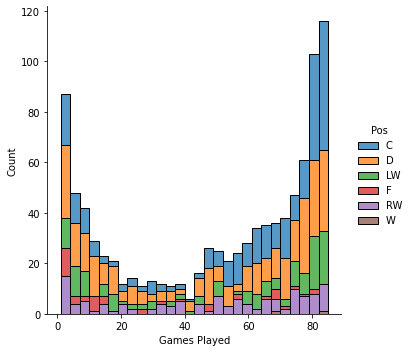

In [10]:
histogram = sb.displot(df2, x='GP', binwidth=3, hue="Pos", multiple="stack")
histogram.set_axis_labels("Games Played", "Count")

A simple histogram to see the distribution of games played by each player for the season. It is interesting to note that Centers appear to see more games than Right Wingers or Forwards, consistently at least. This may be due how many each team has, or simply the structures of some teams not using that role.

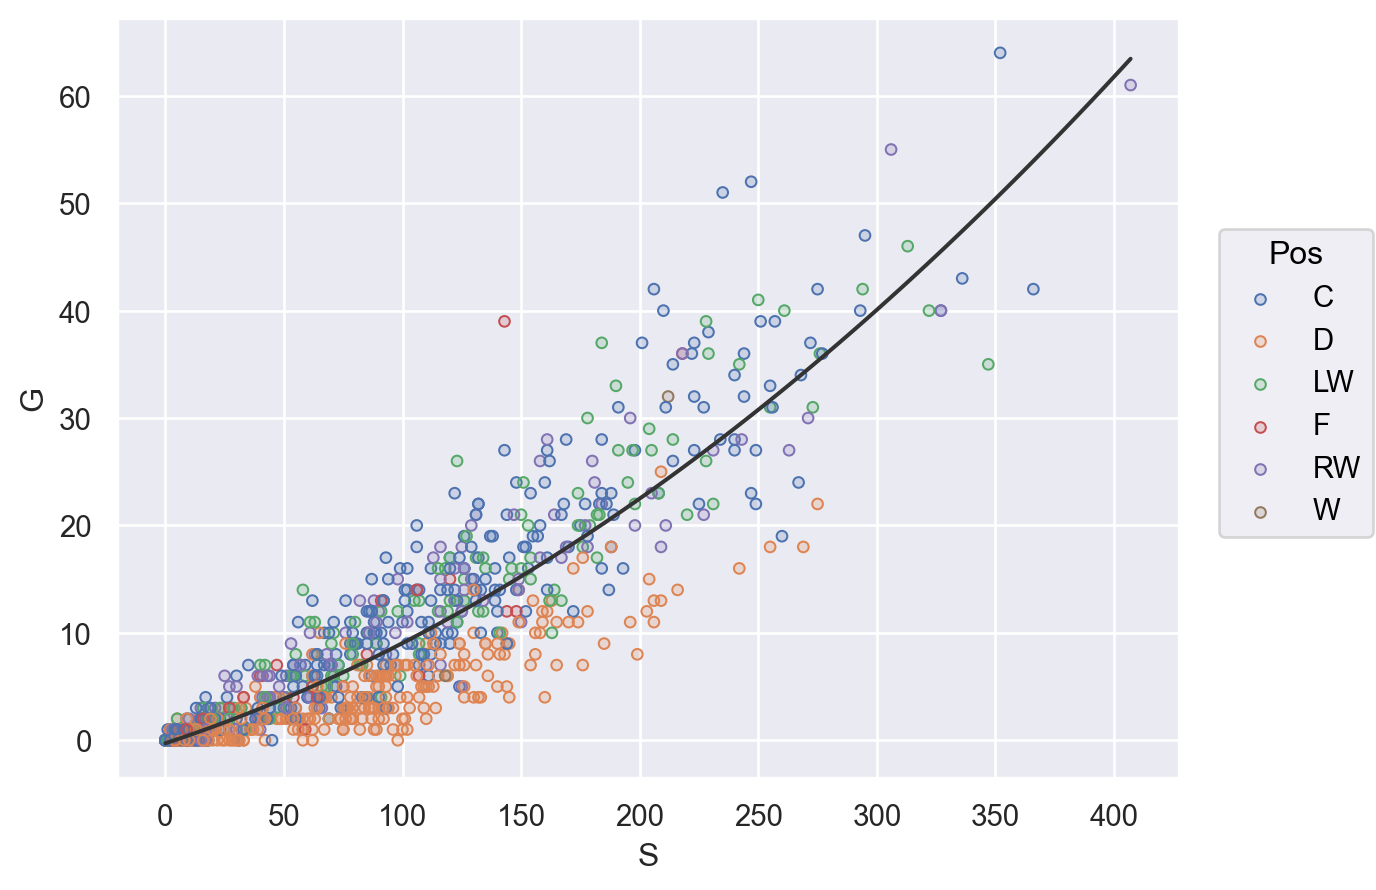

In [19]:
dot = so.Plot(df2, x="S", y="G", color="Pos").add(so.Dots()).add(so.Line(color="0.2"), so.PolyFit(), color=None)
dot.label(x="Shots",y="Goals")
dot.save("shots.png")

Next, Shots taken compared to the goals that were scored. This can also be expressed as the Shooting Percentage metric in the data set, but this helps us to visualize the relationship interms of the team roles. Defenders are less accurate than their more offensive counterparts, but this is logical as they have to split their focus between defending and opportunistic offense.

Note, this was output to a png file as Shiny was throwing errors while trying to render the Seaborn.object plot. The other two plots which were base Seaborn rendered just fine, but Seaborn.object is in beta so it does not appear to be supported by Shiny as this time.

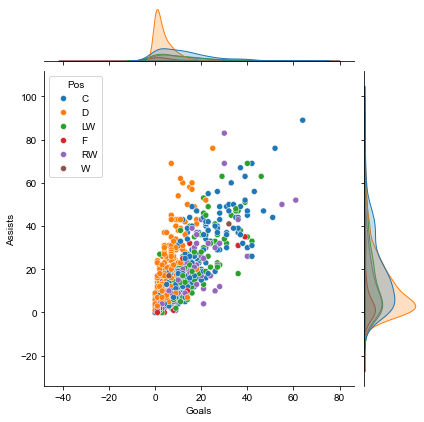

In [31]:
joint = sb.jointplot(df2, x="G", y="A", hue="Pos")
joint.set_axis_labels("Goals","Assists")


Finally, Goals versus Assists. This was a very important question for me to answer coming into this, do all roles share the same relationship between the metrics? No, they do not. Defenders, unsurprisingly, do not score very many goals. However, they do have plenty of chances to pass the puck to their teammates who are better positioned. This results in them seeing more Assists per Goal on average compared to the other roles, and it is extremely consistent across all defensive players.

In [27]:
#import shiny to produce the dashboard
from shiny import ui, render, App
from shiny.types import ImgData

This cannot be run in its current state through a Jupyter notebook, so I copied the code to a regular python file and ran it there.

In [28]:
app_ui = ui.page_fluid(
    ui.panel_title(
        ui.h1("NHL Skater Dashboard"),
        ui.h2("Season 2022-2023"),
    ),
    ui.layout_sidebar(
        ui.panel_sidebar(
            ui.p("This dashboard uses data scraped from ", ui.a('Hockey References ', href="https://www.hockey-reference.com/leagues/NHL_2023_skaters.html"), "to investigate the difference skater positions for the last season."),
            ui.p("The first plot is looking at the distribution of games played for each position. As you can see, the Center position players consistently see more play throughout the season compared to other positions such as Right Winger that have a more uniform distribution."),
            ui.p("In the next visual, we can see the relationship between shots and goals for a player, and how it changes based on the player’s position. One obvious takeaway is that Defenders are usually less successful at landing their shots in the goal, which makes sense since they are already focused on making sure that the puck is not on their side of the rink."),
            ui.p("Finally, this joint plot shows the distribution of Goals and Assists for players along with a scatterplot of their relationship. Defenders are once again standing out from the rest due to how many assists they get per goal made, whereas Centers and Left Wingers have nearly identical relationships. Defenders are more likely to be passing a puck to another skater who makes the actual shot, so this result is expected.")
        ),
        ui.panel_main(
            ui.navset_tab_card(
                ui.nav("Games Played",ui.output_plot("plot1", width="50%")),
                ui.nav("Shots vs Goals",ui.output_image("plot2")),
                ui.nav("Assists vs Goals",ui.output_plot("plot3", width="50%")),
            ),
        ),
    ),
)

def server(input, output, session):
    @output
    @render.plot(alt="Histogram")
    def plot1():
        return histogram
    
    @output
    @render.image
    def plot2():
        from pathlib import Path

        dir = Path(__file__).resolve().parent
        img : ImgData = {"src": str(dir / "shots.png")}
        return img
    
    @output
    @render.plot(alt="Joint Plot")
    def plot3():
        return joint
    
app = App(app_ui, server)